## Lie Algebra Test

In [19]:
from liegroups import SO3,SE3
import numpy as np
import matplotlib.pyplot as plt

$$
SE(3) = \left\{ \mathbf{T}=
                \begin{bmatrix}
                    \mathbf{R} & \mathbf{t} \\
                    \mathbf{0}^T & 1
                \end{bmatrix} \in \mathbb{R}^{4 \times 4} ~\middle|~ \mathbf{R} \in SO(3), \mathbf{t} \in \mathbb{R}^3 \right\}\\
\mathfrak{se}(3) = \left\{ \boldsymbol{\Xi} =
        \boldsymbol{\xi}^\wedge \in \mathbb{R}^{4 \times 4} ~\middle|~
         \boldsymbol{\xi}=
            \begin{bmatrix}
                \boldsymbol{\rho} \\ \boldsymbol{\phi}
            \end{bmatrix} \in \mathbb{R}^6, \boldsymbol{\rho} \in \mathbb{R}^3, \boldsymbol{\phi} \in \mathbb{R}^3 \right\}
$$

In [7]:
def create_SE3_pose(trans, rot_angle_x):
    R = SO3.rotx(rot_angle_x)
    T = np.eye(4,4)
    T[0:3,3] = trans
    T[0:3,0:3] = R.as_matrix()
    return T

In [8]:
T = create_SE3_pose(np.array([1,2,3]), 0.1)
T2 = create_SE3_pose(np.array([5,2,1]), 0.5)
pose1 = SE3.from_matrix(T)
pose2 = SE3.from_matrix(T2)

In [89]:
Xi_12 = (pose1.inv().dot(pose2)).log()
W = np.eye(4,4)
W[0,0] = 100
W[1,1] = 100
W[2,2] = 100
W[3,3] = 1

inner = np.trace(np.matmul(np.matmul(SE3.wedge(Xi_12),W),SE3.wedge(Xi_12).transpose()))
print(f'Distance is {np.sqrt(inner)}')

Distance is 7.2148293621016615


In [67]:
inner = np.matmul(Xi_12.transpose(),Xi_12)
print(f'Distance is {np.sqrt(inner)}')

Distance is 2.8284271247461903


-------------------------------------------

# Distance Comparison

In [44]:
def compute_trans_diff_R3(T, T2):
    return np.linalg.norm(T[0:3, 3] - T2[0:3, 3])
def compute_rot_diff_rodr(T, T2):
    rot_diff = np.trace(np.matmul(T[0:3, 0:3], T2[0:3, 0:3].T))
    return np.arccos((rot_diff - 1)/2)
def compute_se3_diff_weighted(T, T2):
    pose1 = SE3.from_matrix(T)
    pose2 = SE3.from_matrix(T2)
    Xi_12 = (pose1.inv().dot(pose2)).log()
    W = np.eye(4,4)
    W[0,0] = 100
    W[1,1] = 100
    W[2,2] = 100
    W[3,3] = 1
    inner = np.trace(np.matmul(np.matmul(SE3.wedge(Xi_12),W),SE3.wedge(Xi_12).transpose()))
    return np.sqrt(inner)
def compute_se3_diff(T, T2):
    pose1 = SE3.from_matrix(T)
    pose2 = SE3.from_matrix(T2)    
    Xi_12 = (pose1.inv().dot(pose2)).log()    
    
    inner = np.matmul(Xi_12.transpose(),Xi_12)    
    return np.sqrt(inner)
    
def update_trans(T, vec):
    T[0:3,3] = T[0:3,3] + vec.T
    return T

def update_rot(T, angle):
    return create_SE3_pose(T[0:3,3], angle)

In [58]:
T0 = create_SE3_pose(np.array([0,0,0]), 0.0)
T_pert = create_SE3_pose(np.array([0,0,0]), 0.0)
trans_incr = np.array([1,1,1])
rot_incr = 0.4

n_incr = 10
trans_distance_R3 = np.zeros((n_incr, 1))
rot_distance_rodr = np.zeros((n_incr, 1))
trans_distance_SE3 = np.zeros((n_incr, 1))
for i in range(0, n_incr):    
    trans_distance_R3[i] = compute_trans_diff_R3(T0, T_pert)
    rot_distance_rodr[i] = compute_rot_diff_rodr(T0, T_pert)
    trans_distance_SE3[i] = compute_se3_diff_weighted(T0, T_pert)
    
    T_pert = update_trans(T_pert, trans_incr)
    T_pert = update_rot(T_pert, rot_incr*i)
    

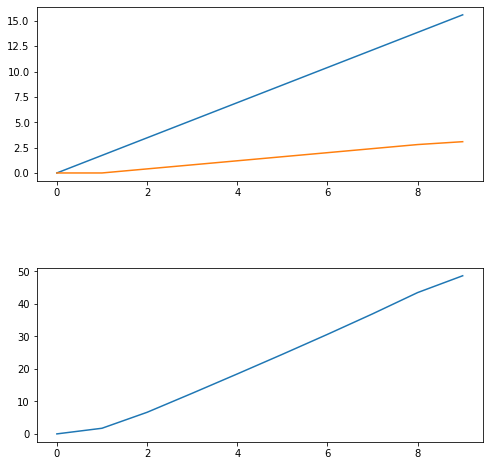

In [59]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
fig.subplots_adjust(hspace=0.5)

axes[0].plot(range(0,n_incr), trans_distance_R3, '-')
axes[0].plot(range(0,n_incr), rot_distance_rodr, '-')
axes[1].plot(range(0,n_incr), trans_distance_SE3, '-')

array([[ 0.        ],
       [ 1.73205081],
       [ 3.46410162],
       [ 5.19615242],
       [ 6.92820323],
       [ 8.66025404],
       [10.39230485],
       [12.12435565],
       [13.85640646],
       [15.58845727]])